# Infopillar Solution

# Data Science

# Task 1- Age and Gender Detection

# Ankita Digambar Adhav


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#load data
fold0 = pd.read_csv(r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\fold_0_data.csv.csv")
fold1 = pd.read_csv(r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\fold_1_data.csv.csv")
fold2 = pd.read_csv(r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\fold_2_data.csv.csv")
fold3 = pd.read_csv(r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\fold_3_data.csv.csv")
fold4 = pd.read_csv(r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\fold_4_data.csv.csv")

In [3]:
df = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True, axis = 0).reset_index(drop = True)
print(fold0.shape, fold1.shape, fold2.shape, fold3.shape, fold4.shape, df.shape)

(4484, 12) (3730, 12) (3894, 12) (3446, 12) (3816, 12) (19370, 12)


In [4]:
print(df.shape)
df.head()

(19370, 12)


,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [5]:
df.dropna(how = 'any').shape

(18591, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(keep = 'first').shape

(19370, 12)

In [8]:
df.dropna(subset = ['user_id', 'original_image', 'age', 'gender', 'x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle',
                   'fiducial_score'], how = 'any').shape

(18591, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [10]:
df.columns

Index(['user_id', 'original_image', 'face_id', 'age', 'gender', 'x', 'y', 'dx',
       'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'],
      dtype='object')

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['face_id', 'x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'], object: ['user_id', 'original_image', 'age', 'gender']}

In [12]:
df.isnull().sum()

user_id                 0
original_image          0
face_id                 0
age                     0
gender                779
x                       0
y                       0
dx                      0
dy                      0
tilt_ang                0
fiducial_yaw_angle      0
fiducial_score          0
dtype: int64

In [13]:
df.nunique()

user_id                 168
original_image        13082
face_id                2284
age                      30
gender                    3
x                      2207
y                      1571
dx                     1435
dy                     1460
tilt_ang                 63
fiducial_yaw_angle        7
fiducial_score          203
dtype: int64

In [14]:
df.notnull().tail()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
19365,True,True,True,True,False,True,True,True,True,True,True,True
19366,True,True,True,True,False,True,True,True,True,True,True,True
19367,True,True,True,True,False,True,True,True,True,True,True,True
19368,True,True,True,True,False,True,True,True,True,True,True,True
19369,True,True,True,True,False,True,True,True,True,True,True,True


In [15]:
df.apply(lambda x: x.dtype)

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

In [16]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

user_id               0.00
original_image        0.00
face_id               0.00
age                   0.00
gender                4.02
x                     0.00
y                     0.00
dx                    0.00
dy                    0.00
tilt_ang              0.00
fiducial_yaw_angle    0.00
fiducial_score        0.00
dtype: float64

In [17]:
#checking for percentage of missing values in each colomns
(df.isnull().sum()/len(df))*100

user_id               0.000000
original_image        0.000000
face_id               0.000000
age                   0.000000
gender                4.021683
x                     0.000000
y                     0.000000
dx                    0.000000
dy                    0.000000
tilt_ang              0.000000
fiducial_yaw_angle    0.000000
fiducial_score        0.000000
dtype: float64

In [18]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing', ascending=False).head(3)

,Total missing,% missing
gender,779,4.021683
user_id,0,0.000000
original_image,0,0.000000


In [19]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':', df[i].nunique())

Unique Values for Each Feature: 

user_id : 168
original_image : 13082
face_id : 2284
age : 30
gender : 3
x : 2207
y : 1571
dx : 1435
dy : 1460
tilt_ang : 63
fiducial_yaw_angle : 7
fiducial_score : 203


In [20]:
#find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

user_id
['30601258@N03' '20254529@N04' '37303189@N08' '62501130@N02'
 '10044155@N06' '29671106@N00' '9017386@N06' '63153065@N07' '10406201@N05'
 '68825596@N05' '113804525@N05' '113528649@N08' '20272804@N04'
 '16166376@N00' '31040257@N06' '113705978@N06' '10241064@N08'
 '34158582@N02' '45666944@N00' '39411334@N02' '113605644@N05'
 '10354155@N05' '7380406@N04' '10113099@N03' '115152228@N06' '7648211@N03'
 '100014826@N03' '7411850@N04' '33592376@N08' '113984426@N05'
 '54030085@N03' '68094148@N04' '10693681@N00' '113830953@N04'
 '114841417@N06' '10792106@N03' '20632896@N03' '30872264@N00'
 '28754132@N06' '10001312@N04' '115153697@N06' '10897942@N03'
 '114987449@N03' '10543088@N02' '8034587@N06' '101295462@N02'
 '101071073@N04' '115046815@N06' '82152000@N00' '39615950@N00'
 '10440927@N07' '34350525@N03' '18142498@N06' '10129575@N03'
 '114978798@N03' '37920461@N06' '8072696@N04' '113707938@N08'
 '54263201@N07' '10611527@N03' '115033594@N04' '8200563@N04'
 '39957446@N00' '101636677@N08' '4611

In [21]:
df.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


In [22]:
df.corr()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
face_id,1.000000,0.023602,-0.014870,-0.080205,-0.079217,0.000502,-0.017950,-0.060456
x,0.023602,1.000000,0.343700,-0.279544,-0.280495,0.212141,0.085254,0.057823
y,-0.014870,0.343700,1.000000,-0.296527,-0.293110,0.124087,-0.028379,0.032776
dx,-0.080205,-0.279544,-0.296527,1.000000,0.991960,-0.181462,0.010966,-0.042889
dy,-0.079217,-0.280495,-0.293110,0.991960,1.000000,-0.174128,0.009100,-0.041269
tilt_ang,0.000502,0.212141,0.124087,-0.181462,-0.174128,1.000000,-0.026677,0.008196
fiducial_yaw_angle,-0.017950,0.085254,-0.028379,0.010966,0.009100,-0.026677,1.000000,0.012730
fiducial_score,-0.060456,0.057823,0.032776,-0.042889,-0.041269,0.008196,0.012730,1.000000


In [23]:
df.describe(include = object)

,user_id,original_image,age,gender
count,19370,19370,19370,18591
unique,168,13082,30,3
top,114841417@N06,10230680375_bdd478d293_o.jpg,"(25, 32)",f
freq,745,15,5004,9372


In [24]:
userid_Series = df['user_id']
userid_levels = userid_Series.unique()
userid_levels

array(['30601258@N03', '20254529@N04', '37303189@N08', '62501130@N02',
       '10044155@N06', '29671106@N00', '9017386@N06', '63153065@N07',
       '10406201@N05', '68825596@N05', '113804525@N05', '113528649@N08',
       '20272804@N04', '16166376@N00', '31040257@N06', '113705978@N06',
       '10241064@N08', '34158582@N02', '45666944@N00', '39411334@N02',
       '113605644@N05', '10354155@N05', '7380406@N04', '10113099@N03',
       '115152228@N06', '7648211@N03', '100014826@N03', '7411850@N04',
       '33592376@N08', '113984426@N05', '54030085@N03', '68094148@N04',
       '10693681@N00', '113830953@N04', '114841417@N06', '10792106@N03',
       '20632896@N03', '30872264@N00', '28754132@N06', '10001312@N04',
       '115153697@N06', '10897942@N03', '114987449@N03', '10543088@N02',
       '8034587@N06', '101295462@N02', '101071073@N04', '115046815@N06',
       '82152000@N00', '39615950@N00', '10440927@N07', '34350525@N03',
       '18142498@N06', '10129575@N03', '114978798@N03', '37920461@N0

In [25]:
originalimage_Series = df['original_image']
originalimage_levels = originalimage_Series.unique()
originalimage_levels

array(['10399646885_67c7d20df9_o.jpg', '10424815813_e94629b1ec_o.jpg',
       '10437979845_5985be4b26_o.jpg', ...,
       '11598166203_c70bb34c80_o.jpg', '11598145163_733cb99713_o.jpg',
       '11598013005_240c2bc9c7_o.jpg'], dtype=object)

In [26]:
age_Series = df['age']
age_levels = age_Series.unique()
age_levels

array(['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)',
       '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3',
       '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)',
       '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32'],
      dtype=object)

In [27]:
gender_Series = df['gender']
gender_levels = gender_Series.unique()
gender_levels

array(['f', 'm', nan, 'u'], dtype=object)

In [28]:
userid_freq_table = pd.crosstab(index = df['user_id'], columns = 'freq')
userid_freq_table

col_0,freq
user_id,
100003415@N08,42
10001312@N04,120
100014826@N03,11
10008401@N05,27
100346410@N05,65
...,...
86629393@N00,281
9017386@N06,165
98075207@N04,24


In [29]:
age_freq_table = pd.crosstab(index = df['age'], columns = 'freq')
age_freq_table

col_0,freq
age,
"(0, 2)",2488
"(15, 20)",1642
"(25, 32)",5004
"(27, 32)",77
"(38, 42)",46
"(38, 43)",2293
"(38, 48)",6
"(4, 6)",2140
"(48, 53)",830


In [30]:
gender_freq_table = pd.crosstab(index = df['gender'], columns = 'freq')
gender_freq_table

col_0,freq
gender,
f,9372
m,8120
u,1099


In [31]:
#list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes!= '0')& (feature not in['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  11


In [32]:
#Discrete Numerical Features
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 2


In [33]:
#Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 9


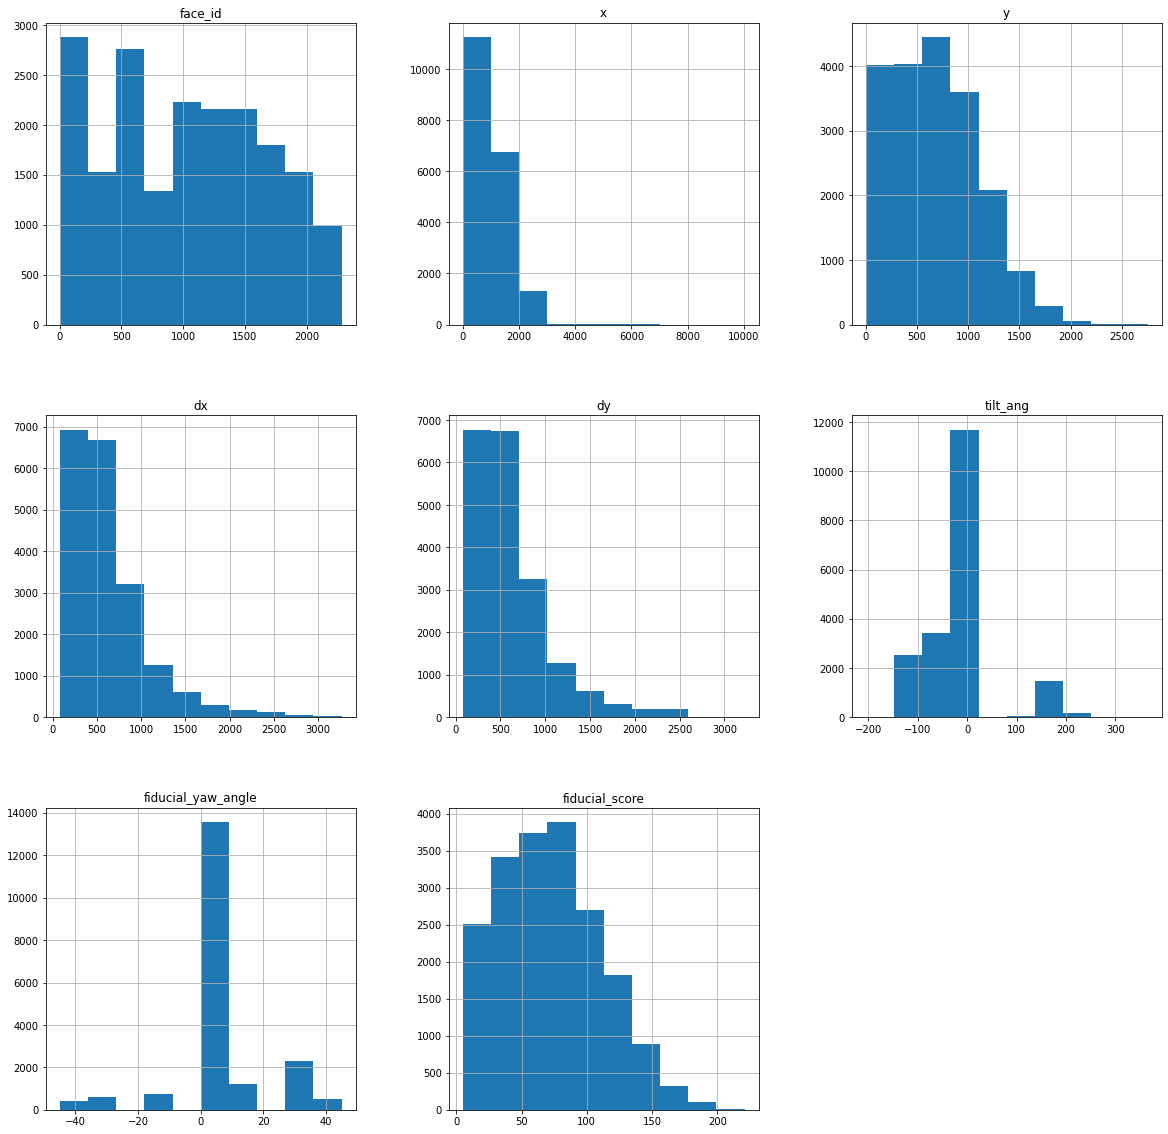

In [34]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

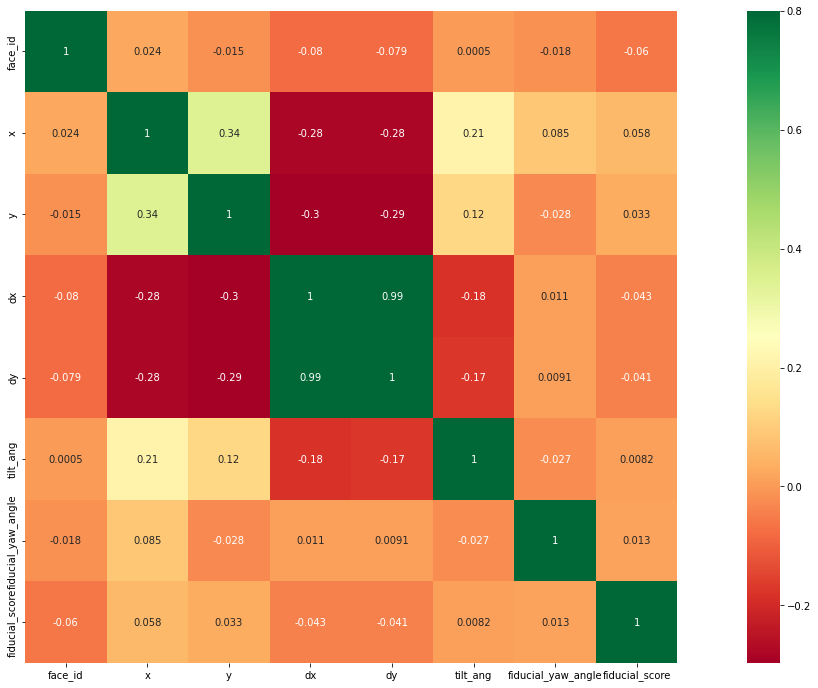

In [35]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True)

In [36]:
df = df.dropna()
#print(df)
df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [37]:
df.dropna(inplace = True)
df. isnull().sum()

user_id               0
original_image        0
face_id               0
age                   0
gender                0
x                     0
y                     0
dx                    0
dy                    0
tilt_ang              0
fiducial_yaw_angle    0
fiducial_score        0
dtype: int64

In [38]:
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['user_id', 'original_image', 'age', 'gender']

In [39]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b', '#00e5ee', '#cd1076', '#008080', '#cd5555', 'red', 'blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

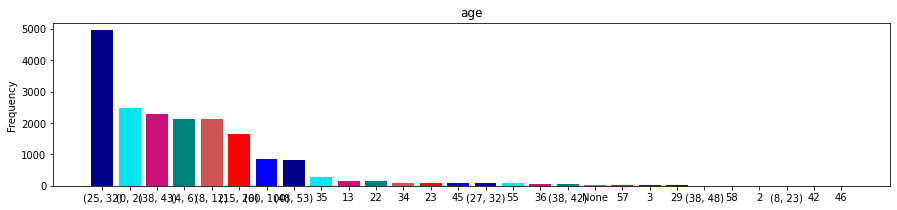

age: 
 (25, 32)     4953
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2119
(15, 20)     1642
(60, 100)     867
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
None           40
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64


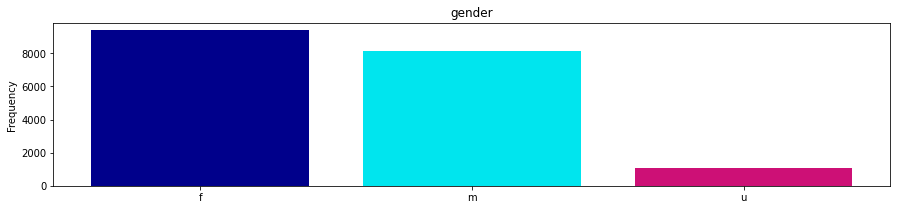

gender: 
 f    9372
m    8120
u    1099
Name: gender, dtype: int64


In [40]:
categorical_cols = ['age', 'gender']
for c in categorical_cols:
    bar_plot(c)

In [41]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    
    for index, col in enumerate(categorcial_variables):
        print("-------------",col,"value counts---------------------")
        print(df[col].value_counts())
        
        
        print("\n\n------------Number of categories in each columns-----------------")
        for i in categorcial_variables:
            a = df[i].unique()
            print("There are{} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------- user_id value counts---------------------
114841417@N06    745
30601258@N03     741
29671106@N00     598
20254529@N04     557
8410632@N03      542
                ... 
50458575@N08       2
113771355@N07      2
68666269@N03       2
104937236@N08      1
10693681@N00       1
Name: user_id, Length: 163, dtype: int64


------------Number of categories in each columns-----------------
There are163 categories in user_id
There are12489 categories in original_image
There are28 categories in age
There are3 categories in gender
------------- original_image value counts---------------------
11014305184_25bc533930_o.jpg    15
10230677545_1be11b5762_o.jpg    15
10230680375_bdd478d293_o.jpg    15
12120012874_6f5202c1f9_o.jpg    14
12119902023_bb49e9b241_o.jpg    14
                                ..
9809793275_02af095645_o.jpg      1
11212351504_fd1174786f_o.jpg     1
10653600254_e174723012_o.jpg     1
11827103153_fab1d5dc63_o.jpg     1
9429464468_1bfc39ecfb_o.jpg      1
Name: original_

In [42]:
df['gender'].value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='gender'>

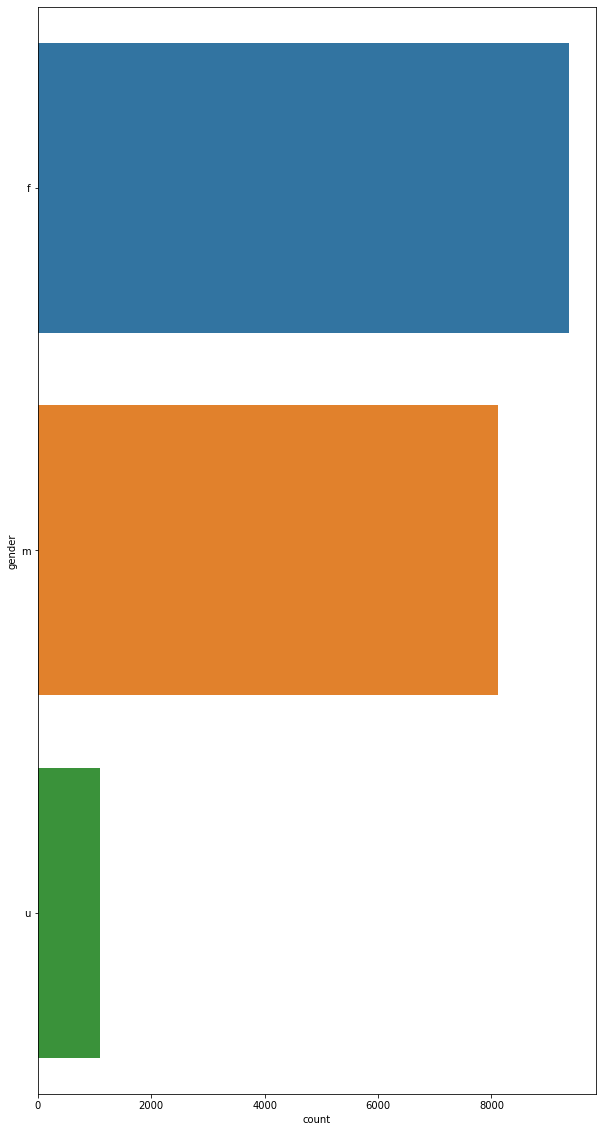

In [43]:
plt.figure(figsize=(10,20))
sns.countplot(y = df['gender'])

<AxesSubplot:ylabel='gender'>

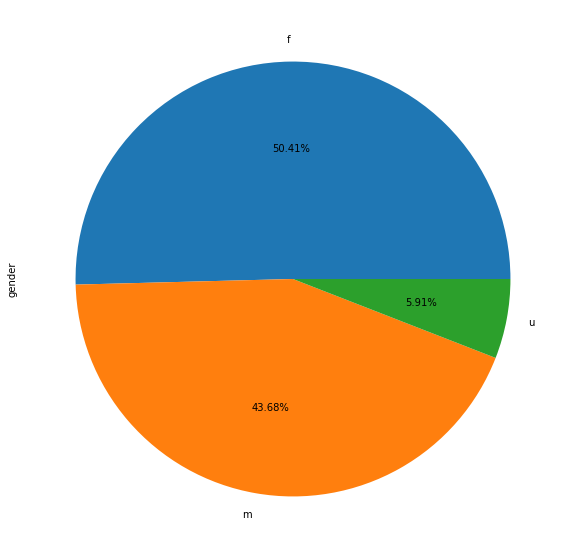

In [44]:
plt.figure(figsize=(10,10))
df['gender'].value_counts().plot.pie(autopct="%0.2f%%")

In [45]:
df['age'].value_counts()

(25, 32)     4953
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2119
(15, 20)     1642
(60, 100)     867
(48, 53)      825
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
None           40
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
(8, 23)         1
42              1
46              1
Name: age, dtype: int64

<AxesSubplot:xlabel='count', ylabel='age'>

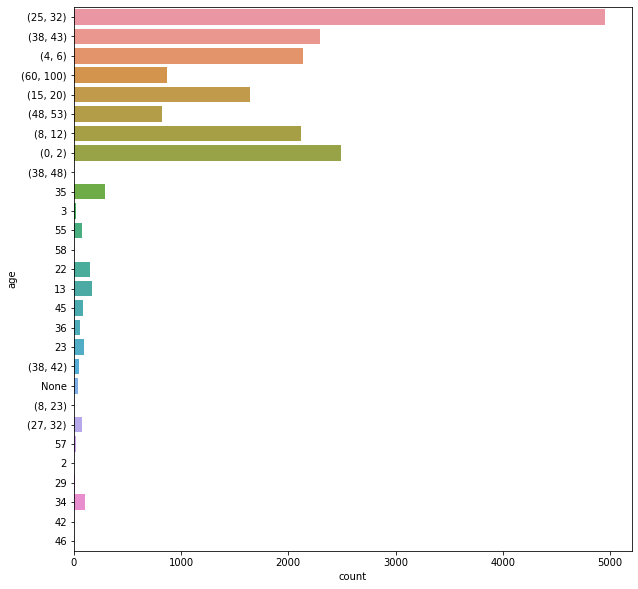

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['age'])

<AxesSubplot:ylabel='age'>

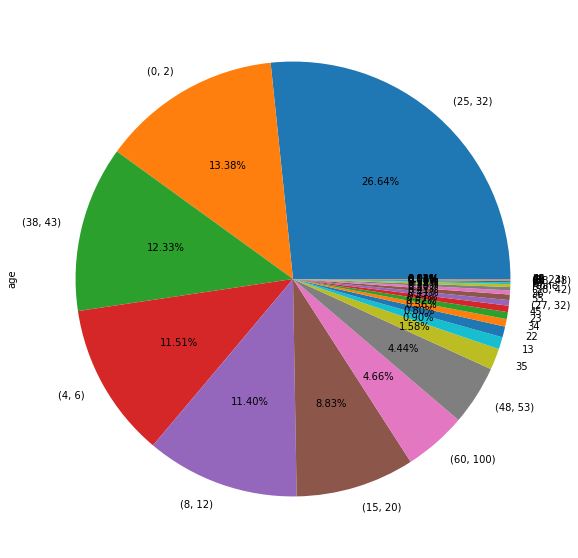

In [47]:
plt.figure(figsize=(10,10))
df['age'].value_counts().plot.pie(autopct="%0.2f%%")

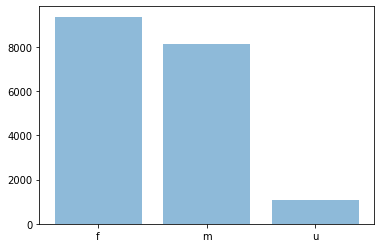

In [48]:
#bar chart
gender = ['f', 'm', 'u']
plt.bar(gender, df.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [49]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten,Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

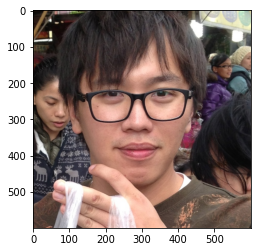

In [54]:
path = r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\AdienceBenchmarkGenderAndAgeClassification\faces\10001312@N04\coarse_tilt_aligned_face.616.8531990910_8f65e5a4e2_o.jpg"
img = load_img(path)
plt.imshow(img)
plt.show()

In [55]:
imp_data = df[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()
img_path = []
for row in df.iterrows():
    path = r"C:\Users\ankita adhav\OneDrive\Desktop\Age and Gender detection\AdienceBenchmarkGenderAndAgeClassification\AdienceBenchmarkGenderAndAgeClassification\faces\10001312@N04\coarse_tilt_aligned_face.616.8531990910_8f65e5a4e2_o.jpg"
    img_path.append(path)
imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18591 entries, 0 to 19345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18591 non-null  object
 1   gender  18591 non-null  object
 2   x       18591 non-null  int64 
 3   y       18591 non-null  int64 
 4   dx      18591 non-null  int64 
 5   dy      18591 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
1,"(25, 32)",m,301,105,640,641,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
2,"(25, 32)",f,2395,876,771,771,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
3,"(25, 32)",m,752,1255,484,485,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
4,"(25, 32)",m,175,80,769,768,C:\Users\ankita adhav\OneDrive\Desktop\Age and...


In [56]:
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17492 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17492 non-null  object
 1   gender    17492 non-null  object
 2   x         17492 non-null  int64 
 3   y         17492 non-null  int64 
 4   dx        17492 non-null  int64 
 5   dy        17492 non-null  int64 
 6   img_path  17492 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [57]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}
clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",0,0,414,1086,1383,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
1,"(25, 32)",1,301,105,640,641,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
2,"(25, 32)",0,2395,876,771,771,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
3,"(25, 32)",1,752,1255,484,485,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
4,"(25, 32)",1,175,80,769,768,C:\Users\ankita adhav\OneDrive\Desktop\Age and...


In [58]:
clean_data['age'] = clean_data['age'].map({'(25, 32)': 0, '(0, 2)': 1, '(38, 43)': 2, '(4, 6)': 3, '(8, 12)': 4, '(15, 20)': 5, 
                                           '(60, 100)': 6, '(48, 53)': 7, '35': 8, '13': 9, '22': 10, '34': 11, '23': 12, '45': 13, 
                                           '(27, 32)': 14, '55': 15, '36': 16, '(38, 42)': 17, 'None': 18, '57': 19, '3': 20, '29': 21, 
                                           '(38, 48)': 22, '58': 23, '2': 24, '42': 25, '(8, 23)': 26, '46': 27})
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,0,0,0,414,1086,1383,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
1,0,1,301,105,640,641,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
2,0,0,2395,876,771,771,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
3,0,1,752,1255,484,485,C:\Users\ankita adhav\OneDrive\Desktop\Age and...
4,0,1,175,80,769,768,C:\Users\ankita adhav\OneDrive\Desktop\Age and...


In [59]:
X = clean_data[['img_path']]
y = clean_data[['gender']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))
train_images = []
test_images = []
for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)
for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)
print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12244, 1)
Test data shape (5248, 1)
Train images shape (12244, 227, 227, 3)
Test images shape (5248, 227, 227, 3)


In [60]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=25, validation_data=(test_images, y_test), callbacks=[callback])
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
model.save('gender_model25.h5')

Epoch 1/25


C:\Users\ankita adhav\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


383/383 [==============================] - ETA: 0s - loss: 0.9352 - accuracy: 0.5266

C:\Users\ankita adhav\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


383/383 [==============================] - 947s 2s/step - loss: 0.9352 - accuracy: 0.5266 - val_loss: 0.6904 - val_accuracy: 0.5373
Epoch 2/25
233/383 [=================>............] - ETA: 3:31 - loss: 0.6904 - accuracy: 0.5380

In [ ]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

In [ ]:
X = clean_data[['img_path']]
y = clean_data[['age']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))
train_images = []
test_images = []
for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)
for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)
print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))
model.summary()